# lmplot using seaborn  

* This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.
* <code>seaborn.lmplot(x=, y=, data=,...)</code>
* [seaborn docs for lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

-----------

## Seaborn's regresion plot - lmplot

In [2]:
df=pd.read_csv("data\Compustat_from_1990.csv")[['fyear', 'tic', 'at', 'ni', 'mv', 'sale']] # mv is already in million dollars.
tickers= ['AAPL', 'MSFT', 'AMZN']
df= df[df.tic.isin(tickers)]
df= df[df.fyear>=2000]
print(df.shape)
df.head()

(63, 6)


,fyear,tic,at,ni,mv,sale
3525,2000,AAPL,6803.0,786.0,8643.68275,7983.0
3526,2001,AAPL,6021.0,-25.0,5442.80022,5363.0
3527,2002,AAPL,6298.0,65.0,5204.90550,5742.0
3528,2003,AAPL,6815.0,69.0,7598.58344,6207.0
3529,2004,AAPL,8050.0,276.0,15168.45500,8279.0


In [3]:
df['lag_at']= df.groupby('tic')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']

# log(at)
df['log_at']=np.log(df['at'])

df.head()

,fyear,tic,at,ni,mv,sale,lag_at,ROA,log_at
3525,2000,AAPL,6803.0,786.0,8643.68275,7983.0,NaN,NaN,8.825119
3526,2001,AAPL,6021.0,-25.0,5442.80022,5363.0,6803.0,-0.003675,8.703009
3527,2002,AAPL,6298.0,65.0,5204.90550,5742.0,6021.0,0.010796,8.747987
3528,2003,AAPL,6815.0,69.0,7598.58344,6207.0,6298.0,0.010956,8.826881
3529,2004,AAPL,8050.0,276.0,15168.45500,8279.0,6815.0,0.040499,8.993427


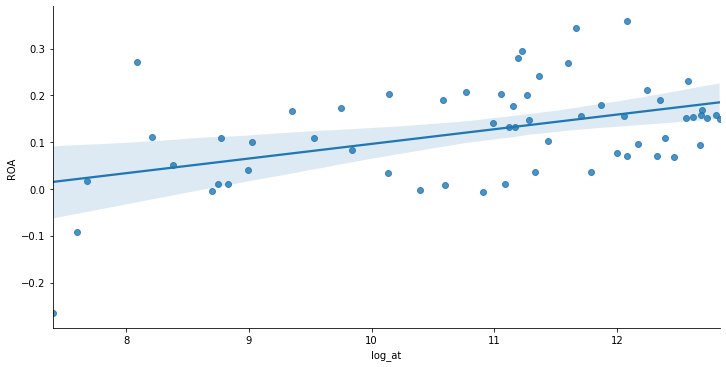

In [4]:
sns.lmplot(x='log_at', y= 'ROA', data= df, height= 5, aspect= 2)
plt.show()

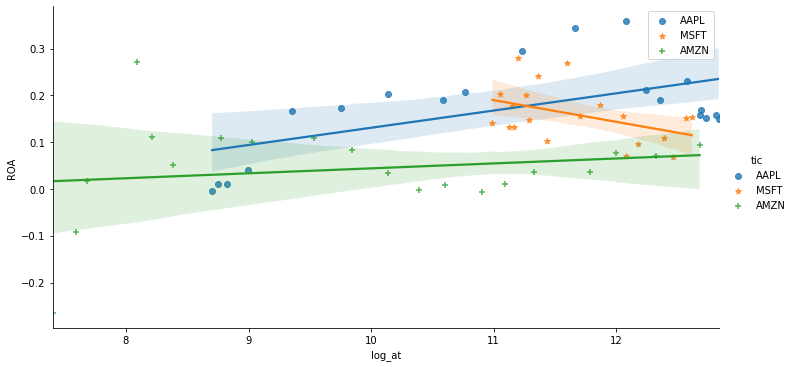

In [5]:
sns.lmplot(x='log_at', y= 'ROA', data= df, height= 5, aspect= 2, hue= 'tic', markers=['o', '*', '+'])
plt.legend()
plt.show()

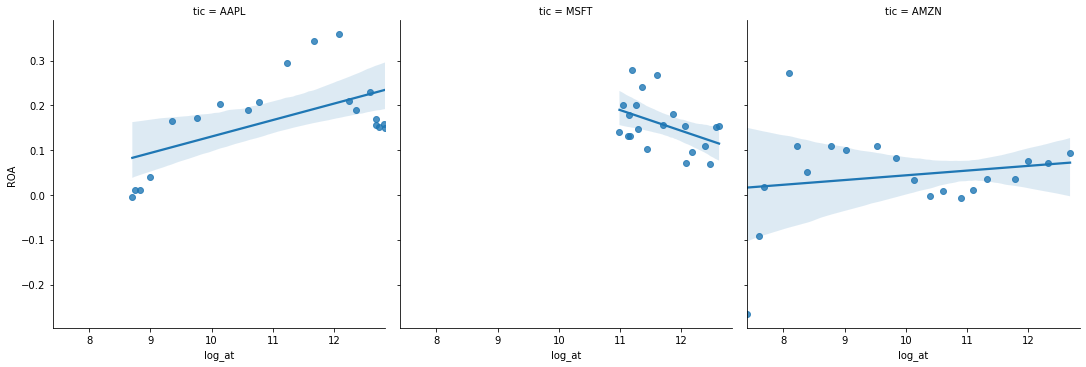

In [7]:
sns.lmplot(x="log_at", y="ROA", col="tic", data=df)
plt.show()

--------------